In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Variances of Y_1 and Y_2 and only Y
3.159482415069837 2.3547968745030303 2.180217921404366
Variances of gaussian noise and random noise
0.9197802944280198 0.07527425606222708


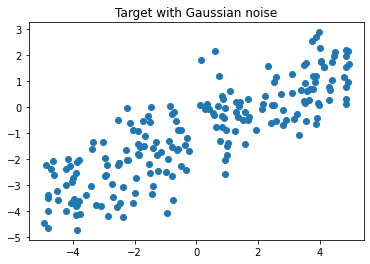

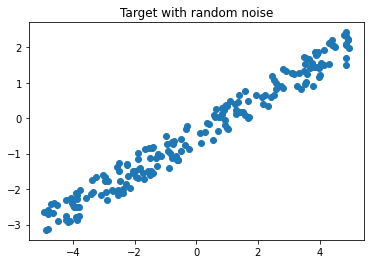

In [ ]:
## Generate random synthetic data

# number of samples
N = 200

# generate random synthetic data in between -5 and 5
X = np.random.random(N) * 10 - 5 


# rng object
rng = np.random.default_rng()
# adding gaussian noise to the target
gaussian_noise = rng.standard_normal(N)
Y_1 = 0.5 * X - 1 + gaussian_noise
# adding random noise to the target
random_noise = rng.random(N)
Y_2 = 0.5 * X - 1 + random_noise
print('Variances of Y_1 and Y_2 and only Y')
print(Y_1.var(), Y_2.var(), (0.5*X -1 ).var())
print('Variances of gaussian noise and random noise')
print(gaussian_noise.var(), random_noise.var())
# plot the data
plt.scatter(X,Y_1)
plt.title('Target with Gaussian noise')
plt.show()
plt.scatter(X,Y_2)
plt.title('Target with random noise')
plt.show()

In [ ]:
# Create the linear model
# we have 1 feature and 1 target so our input and output is 1 
model1 = nn.Linear(1,1) 
model2 = nn.Linear(1,1)

In [ ]:
criterion = nn.MSELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr = 0.1)
optimizer2 = torch.optim.SGD(model2.parameters(), lr = 0.1)

In [ ]:
# reshape the data to have NxM data where N is number of samples and M is number of features/targets
X = X.reshape(N, 1)
Y_1 = Y_1.reshape(N, 1)
Y_2 = Y_2.reshape(N, 1)

In [ ]:
# convert input and target arrays to pytorch tensors 
# numpy arrays are float64 by default but pytorch tensors are float32
# so first I need to convert numpy arrays to float32, then I can initialize pytorch tensors from numpy arrays
inputs = torch.from_numpy(X.astype(np.float32))
targets_1 = torch.from_numpy(Y_1.astype(np.float32))
targets_2 = torch.from_numpy(Y_2.astype(np.float32))

# Expectations
I expect to have more error (higher MSE score) in the data with random noise since it has variance greater than 1 (the variance of gaussian distribution is 1)

To put it simply, take look of variance and MSE 

$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i-h(x^{i}))^2 \\
$

The variance of simple vector $ \vec{u} $ is $ ||\vec{u}||^2 $. So if I say $\overrightarrow{ (h(x^{i})y_i) } $ is a vector, we can find it's length with $ y_i-h(x^{i}) $. Take a square of it, now we got $(y_i-h(x^{i}))^2$ which is the same expression with $||\overrightarrow{(h(x^{i})y_i)}||^2$. And this is the variance of given vector. As a result we can say that MSE may change according to given datasets variance. So adding noise with variance 1 would've higher MSE score than adding noise with variance 0.5 would've resulted 

TLDR; MSE and variance of the data is related with each other because of definition of variance and MSE. 

In [ ]:
# Training
n_epochs = 20
losses_1 = []
losses_2 = []

# train model1 with Y_1 and model2 with Y_2. Then compare the losses
for _ in range(n_epochs):
  # forward propagation
  # predict
  outputs1 = model1(inputs)
  outputs2 = model2(inputs)
  # calculate losses
  loss1 = criterion(outputs1, targets_1)
  loss2 = criterion(outputs2, targets_2)

  # keep the losses to plot them later
  losses_1.append(loss1.item())
  losses_2.append(loss2.item())

  # backprop
  loss1.backward()
  loss2.backward()
  optimizer1.step()
  optimizer2.step()


  # reset the gradients (by setting them to 0) in order to prevent gradient accumulation.
  optimizer1.zero_grad()
  optimizer2.zero_grad()

  # print out the epoch, losses and difference between losses
  print(f"Epoch {_+1}/{n_epochs}, Loss for model1: {loss1.item():.4f}, Loss for model2: {loss2.item():.4f}, Difference between losses {np.abs(loss1.item()-loss2.item())}")

Epoch 1/20, Loss for model1: 5.8493, Loss for model2: 2.3531, Difference between losses 3.496196746826172
Epoch 2/20, Loss for model1: 3.7598, Loss for model2: 1.3546, Difference between losses 2.4051958322525024
Epoch 3/20, Loss for model1: 2.5622, Loss for model2: 0.7946, Difference between losses 1.7676106691360474
Epoch 4/20, Loss for model1: 1.8734, Loss for model2: 0.4801, Difference between losses 1.393293708562851
Epoch 5/20, Loss for model1: 1.4758, Loss for model2: 0.3033, Difference between losses 1.1724924445152283
Epoch 6/20, Loss for model1: 1.2454, Loss for model2: 0.2038, Difference between losses 1.0416124016046524
Epoch 7/20, Loss for model1: 1.1113, Loss for model2: 0.1476, Difference between losses 0.9636506736278534
Epoch 8/20, Loss for model1: 1.0329, Loss for model2: 0.1159, Difference between losses 0.9169810265302658
Epoch 9/20, Loss for model1: 0.9868, Loss for model2: 0.0979, Difference between losses 0.8889063820242882
Epoch 10/20, Loss for model1: 0.9597, L

[]

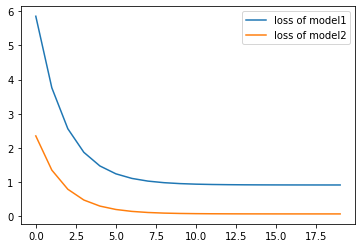

In [ ]:
# plot both losses
plt.plot(losses_1, label = 'loss of model1')
plt.plot(losses_2, label = 'loss of model2')
plt.legend()
plt.plot()

In [ ]:
# Let's see the weights and biases that our models found
print('Model1')
print(model1.weight.data.numpy(), model1.bias.data.numpy())
print('Model2')
print(model2.weight.data.numpy(), model2.bias.data.numpy())

print('Correct value for weight is .5 and for bias is -1')

print('As a result, we can say that model1 did kinda better job.')
print('This result concludes my experiment, as a conclusion we can say that the model did better with gaussian noise rather than random noise')

Model1
[[0.504816]] [-1.0246989]
Model2
[[0.5099346]] [-0.43307078]
Correct value for weight is .5 and for bias is -1
As a result, we can say that model1 did kinda better job.
This result concludes my experiment, as a conclusion we can say that the model did better with gaussian noise rather than random noise
